Data loaded successfully.

--- List Report (First 10 Transactions) ---
+---+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|_c0|Invoice|StockCode|         Description|Quantity|        InvoiceDate|Price|Customer ID|       Country|
+---+-------+---------+--------------------+--------+-------------------+-----+-----------+--------------+
|  0| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01 07:45:00| 6.95|    13085.0|United Kingdom|
|  1| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
|  2| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01 07:45:00| 6.75|    13085.0|United Kingdom|
|  3| 489434|    22041|"RECORD FRAME 7""...|      48|2009-12-01 07:45:00|  2.1|    13085.0|United Kingdom|
|  4| 489434|    21232|STRAWBERRY CERAMI...|      24|2009-12-01 07:45:00| 1.25|    13085.0|United Kingdom|
|  5| 489434|    22064|PINK DOUGHNUT TRI...|      24|2009-12-01 07:45:00|

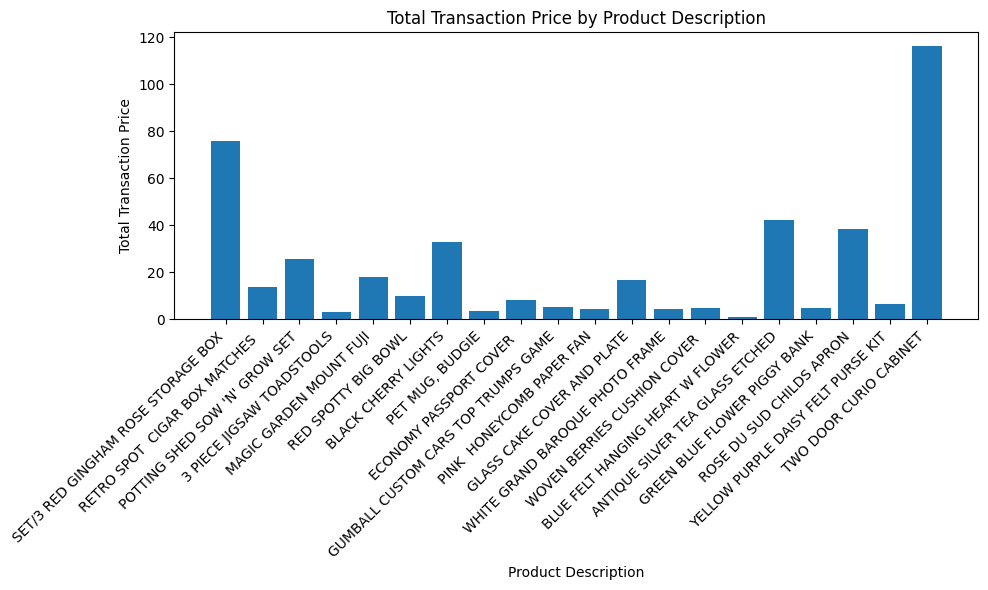

Chart saved to description_transaction_chart.png

--- Data Grouping & Sorting (Transactions by Country, sorted by Price) ---
+---------------+------------------+
|        Country|       Total Price|
+---------------+------------------+
| United Kingdom| 42452.66999999939|
|           EIRE| 570.2099999999999|
|         France| 352.4199999999998|
|       Portugal|208.74999999999983|
|        Germany|156.47999999999993|
|Channel Islands|145.77999999999997|
|            USA|             141.0|
|        Belgium|             130.0|
|    Netherlands| 49.33000000000001|
|      Australia|40.400000000000006|
|         Poland| 40.17999999999999|
|        Nigeria|               6.8|
|          Japan| 6.140000000000001|
|          Spain|              3.35|
|        Denmark|               2.1|
+---------------+------------------+


--- Adding Calculations (Transaction Price with Tax) ---
+-------+-----+------------------+
|Invoice|Price|    price_with_tax|
+-------+-----+------------------+
| 489434

In [5]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum, count
import matplotlib.pyplot as plt

# Create a Spark session for distributed data processing
spark = SparkSession.builder.appName("TransactionalDataAnalysis").getOrCreate()

# Define the path to the CSV file
data_path = "/content/data-analytics A6.csv"

try:
    # Load CSV data into a Spark DataFrame with header and inferred schema
    df = spark.read.csv(data_path, header=True, inferSchema=True)
    print("Data loaded successfully.")

    # -----------------------------
    # --- Data Visualization Reports ---
    # -----------------------------

    # 1. List Report: Display first 10 rows (sample records)
    print("\n--- List Report (First 10 Transactions) ---")
    df.show(10)

    # 2. Crosstabs Report: Create a cross-tabulation of Description vs Country
    print("\n--- Crosstabs Report (Transactions by Description and Country) ---")
    crosstab_df = df.crosstab("Description", "Country")
    crosstab_df.show()

    # 3. Chart Report: Create a bar chart showing total transaction price by product description
    print("\n--- Chart Report (Bar Chart - Transaction Price by Description) ---")
    df_filtered_description = df.filter(col("Description").isNotNull())  # Remove null descriptions
    category_summary_df = df_filtered_description.groupBy("Description").agg(sum("Price").alias("Total Price"))
    category_summary_pdf = category_summary_df.toPandas()  # Convert to Pandas DataFrame for plotting

    # Plot bar chart using matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(category_summary_pdf["Description"].head(20), category_summary_pdf["Total Price"].head(20))
    plt.xlabel("Product Description")
    plt.ylabel("Total Transaction Price")
    plt.title("Total Transaction Price by Product Description")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show("description_transaction_chart.png")
    print("Chart saved to description_transaction_chart.png")
    plt.close()

    # -----------------------------
    # --- Data Grouping & Sorting ---
    # -----------------------------

    print("\n--- Data Grouping & Sorting (Transactions by Country, sorted by Price) ---")
    grouped_sorted_df = df.groupBy("Country").agg(sum("Price").alias("Total Price")).orderBy(col("Total Price").desc())
    grouped_sorted_df.show()

    # -----------------------------
    # --- Adding Calculations to Reports ---
    # -----------------------------

    print("\n--- Adding Calculations (Transaction Price with Tax) ---")
    calculated_df = df.withColumn("price_with_tax", col("Price") * 1.05)  # Add 5% tax
    calculated_df.select("Invoice", "Price", "price_with_tax").show()

    # -----------------------------
    # --- Conditional Formatting ---
    # -----------------------------

    print("\n--- Conditional Formatting (Example: Flagging high-value transactions) ---")
    high_value_threshold = 1000  # Threshold for high value
    conditional_df = df.withColumn("high_value_transaction", col("Price") > high_value_threshold)
    conditional_df.filter(col("high_value_transaction") == True).show()

    # -----------------------------
    # --- Adding Summary Lines to Reports ---
    # -----------------------------

    print("\n--- Adding Summary Lines to Reports (Example: Summary statistics for Price) ---")
    summary_stats = df.agg(
        count("Price").alias("count"),
        avg("Price").alias("average"),
        sum("Price").alias("total")
    )
    summary_stats.show()

    # -----------------------------
    # --- Filtering Reports ---
    # -----------------------------

    print("\n--- Filtering Reports (Example: Transactions from United Kingdom) ---")
    filtered_df = df.filter(col("Country") == "United Kingdom")
    filtered_df.show()

    # -----------------------------
    # --- Map Report Placeholder ---
    # -----------------------------

    print("\n--- Map Report (Example: Not explicitly implemented in this script) ---")

    print("\n--- Report Generation Completed (Simplified Reports) ---")

except Exception as e:
    print(f"Error loading or processing data: {e}")


In [6]:
spark.stop()

In [ ]:
"""

Concept Notes
🔹 1. SparkSession
Entry point to work with DataFrames and SQL in PySpark.

Example: SparkSession.builder.appName("AppName").getOrCreate()

🔹 2. DataFrame Operations
read.csv(): Reads CSV files into DataFrames.

show(): Displays top rows of a DataFrame.

filter(): Filters rows based on conditions.

groupBy().agg(): Groups data and applies aggregate functions like sum, avg.

🔹 3. Data Visualization
matplotlib.pyplot: Python plotting library used for visualizing data (converted to Pandas before plotting).

plt.bar(): Creates bar chart.

toPandas(): Converts Spark DataFrame to Pandas DataFrame (useful for small data).

🔹 4. Crosstab
crosstab(col1, col2): Similar to pivot table; shows count of occurrences for combinations of two categorical variables.

🔹 5. Adding Columns
withColumn(): Used to create new columns or transform existing ones.

Useful for tax calculations or conditional flags.

🔹 6. Conditional Formatting
Used here to flag high-value transactions with boolean conditions.

🔹 7. Summary Statistics
Aggregation functions like sum(), avg(), count() are used to summarize the dataset.

🔹 8. Filtering
filter(col("column_name") == value): Extracts rows that match the condition, useful for targeted reporting.

🔹 9. Error Handling
try-except block is used to catch and display errors related to data loading or processing.

🔹 10. Map Report (Not implemented)
Typically used for geographical data visualizations.

Can be implemented using libraries like folium, geopandas, or Google Maps API.

"""